# Bank Marketing (with social/economic context)

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable (_y_) marked 'yes', otherwise 'no'

Downloaded from https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset


In [150]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load Data

In [151]:
 df = pd.read_csv("../data/clean/bank-additional-full_cleaned.csv")

In [152]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [153]:
df.shape

(41176, 21)

In [154]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Feature Exploration

**Overal Statistic**

In [155]:
for column in df.columns:
    print('Statistic for', column)
    print(df[column].describe())
    print('---------------------')

Statistic for age
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
---------------------
Statistic for job
count      41176
unique        12
top       admin.
freq       10419
Name: job, dtype: object
---------------------
Statistic for marital
count       41176
unique          4
top       married
freq        24921
Name: marital, dtype: object
---------------------
Statistic for education
count                 41176
unique                    8
top       university.degree
freq                  12164
Name: education, dtype: object
---------------------
Statistic for default
count     41176
unique        3
top          no
freq      32577
Name: default, dtype: object
---------------------
Statistic for housing
count     41176
unique        3
top         yes
freq      21571
Name: housing, dtype: object
---------------------
Statistic for loan
count 

### 1. Proportion of the customers who made the deposit after the campaign and who didn\'t.

In [156]:
#split the df
df_yes = df[df.y == 'yes']
df_no = df[df.y == 'no']

In [157]:
#count the values for 'yes' and 'no'
yes_count = df_yes.y.count()
no_count = df_no.y.count()

In [158]:
#create a new temporary df
data= {'YES_deposit': [yes_count], 'NO_deposit': [no_count]}
yes_no = pd.DataFrame(data, columns = ['YES_deposit', 'NO_deposit'])
yes_no

,YES_deposit,NO_deposit
0,4639,36537


In [159]:
#calcucalte few vars for the bar
customers_involved = df.shape[0]
percentage = (yes_count/customers_involved) * 100
efficiency = round(percentage, 1)

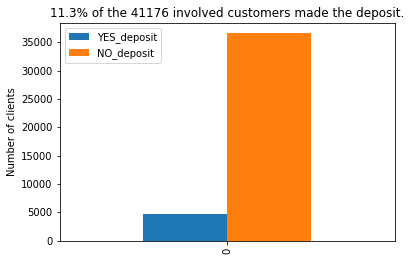

In [160]:
#plot a bar
yes_no.plot(kind="bar")
plt.title('{}% of the {} involved customers made the deposit.'.format(efficiency,customers_involved))
plt.ylabel('Number of clients')
plt.show();

### 2. Some of the customers were already contacted before. Does this had an impact on the deposit decision?

In [161]:
contacted_prev_campaign = df[df.pdays!=999]

In [162]:
current_yes = contacted_prev_campaign[contacted_prev_campaign.y=='yes'].y.count()
current_no = contacted_prev_campaign[contacted_prev_campaign.y=='no'].y.count()

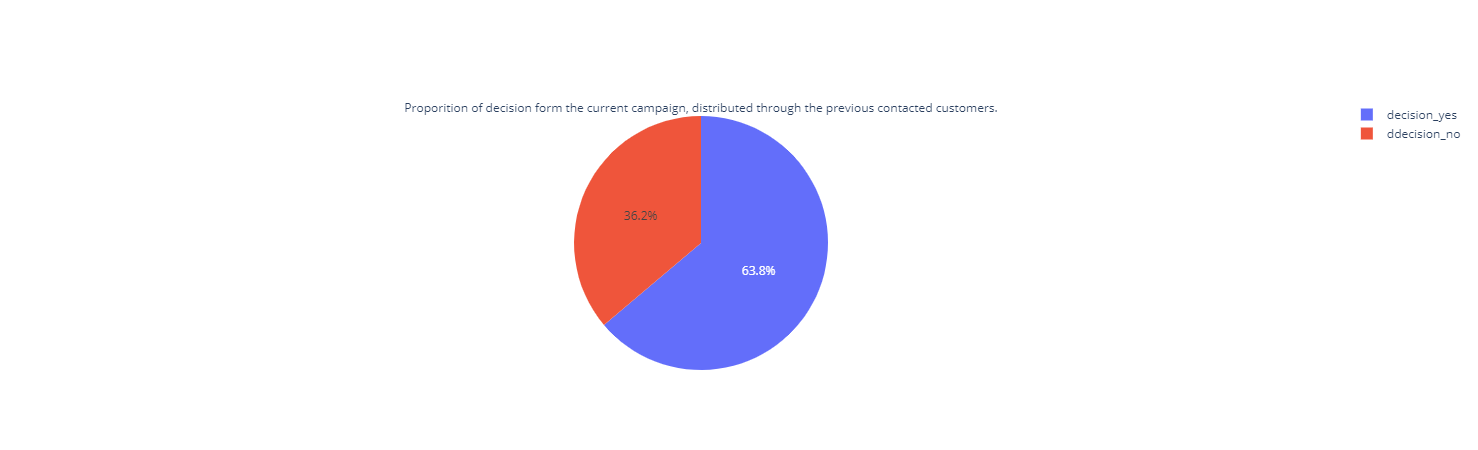

In [163]:
labels = ['decision_yes', 'ddecision_no']
values = [current_yes,current_no]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Proporition of decision form the current campaign, distributed through the previous contacted customers.")])
fig.show()

From the pie chart above we see that the number of the customers who were previously contacted and made the deposit is significantly higher than the number of customers who didn't made the deposit. As a conclusion, there is a positiv impact on the deposit decision if the customer was contacted before the current campaign.

### 3. How the customers changed their loyality since the last campaign?

First let us see how was the proportion of the decision from the previous campaign.

In [164]:
prev_yes = contacted_prev_campaign[(contacted_prev_campaign.poutcome == 'success')]
prev_no = contacted_prev_campaign[(contacted_prev_campaign.poutcome == 'failure')]

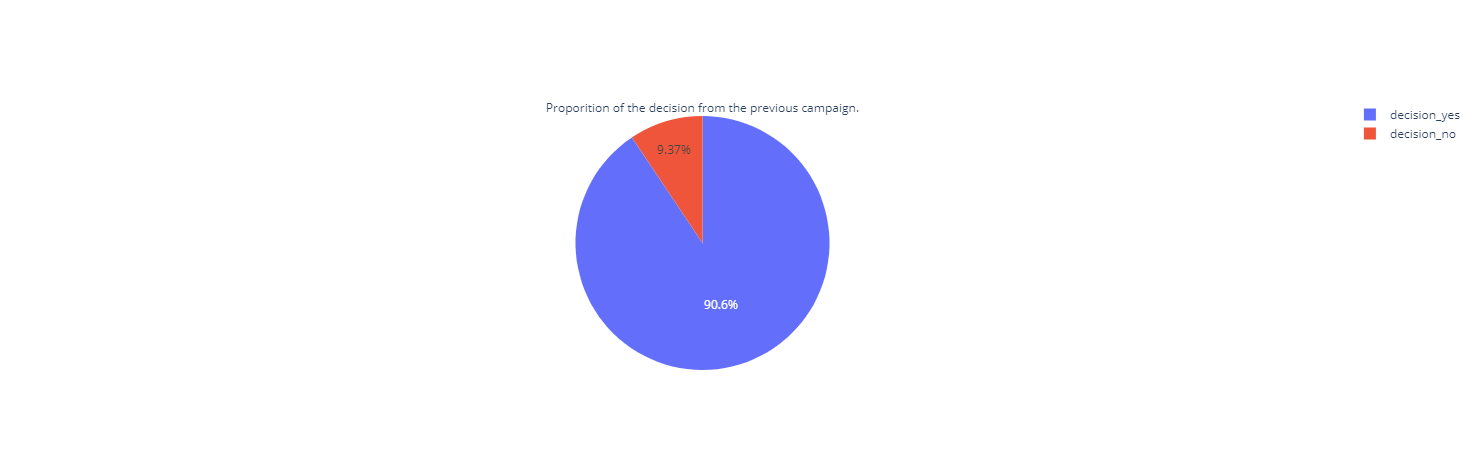

In [165]:
labels = ['decision_yes', 'decision_no']
values = [prev_yes.y.count(), prev_no.y.count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Proporition of the decision from the previous campaign.") ])
fig.show()

Now, let us see the changes.

In [166]:
changed_to_yes = prev_no[contacted_prev_campaign.y == 'yes'].y.count()
changed_to_no = prev_yes[contacted_prev_campaign.y == 'no'].y.count()
stick_to_yes = prev_yes[contacted_prev_campaign.y == 'yes'].y.count()
stick_to_no = prev_no[contacted_prev_campaign.y == 'no'].y.count()

C:\Users\Develop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Develop\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Develop\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Develop\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [167]:
percentage_stick_to_yes = round(stick_to_yes/prev_yes.y.count()*100, 2)
print('''Stick to yes:
{}% of the customers who said yes last campaign stick to their decision.'''.format(percentage_stick_to_yes))

Stick to yes:
65.11% of the customers who said yes last campaign stick to their decision.


In [168]:
percentage_changed_to_no = round(changed_to_no/prev_yes.y.count()*100, 2)
print('''Changed to no:
{}% of the customers who said yes last campaign changed their decision negatively.'''.format(percentage_changed_to_no))

Changed to no:
34.89% of the customers who said yes last campaign changed their decision negatively.


In [169]:
percentage_stick_to_no = round(stick_to_no/prev_no.y.count()*100, 2)
print('''Stick to no:
{}% of the customers who said no last campaign stick to their decision.'''.format(percentage_stick_to_no))

Stick to no:
48.59% of the customers who said no last campaign stick to their decision.


In [170]:
percentage_changed_to_yes = round(changed_to_yes/prev_no.y.count()*100, 2)
print('''Changed to yes:
{}% of the customers who said no last campaign changed their decision positively'''.format(percentage_changed_to_yes))

Changed to yes:
51.41% of the customers who said no last campaign changed their decision positively


In [171]:
changed = changed_to_no+changed_to_yes
percentage_changed = round(changed/contacted.y.count()*100, 2)

stick = stick_to_no+stick_to_yes
percentage_stick = round(stick/contacted.y.count()*100, 2)

change_customer_amount_yes = current_yes-prev_yes.y.count()

print('''In overall,
in terms of percentage {}% of the customers changed their mind, and respectively, {}% stick to their previous decision.
in terms of customers there were loss of 406 customers.'''.format(percentage_changed, percentage_stick, change_customer_amount_yes*-1))

In overall,
in terms of percentage 36.44% of the customers changed their mind, and respectively, 63.56% stick to their previous decision.
in terms of customers there were loss of 406 customers.


#### Conclusion: Through the current campaign the bank gained a little more then half of customers which had previously a negative decision. But there was also a significant loss of the previously loyal customers.

### 4. Distribution of personal and housing loan to age.

In [233]:
loan_housing = df
#drop rows where the value is 'unknown'
unknown = loan_housing.loc[(loan_housing.loan == 'unknown')|(loan_housing.housing == 'unknown')].index
loan_housing_cleaned = loan_housing.drop(unknown)

#map the values to integers
loan_housing_cleaned.loan = loan_housing_cleaned.loan.map({'no':0, 'yes':1}).astype('uint8')
loan_housing_cleaned.housing = loan_housing_cleaned.housing.map({'no':0, 'yes':1}).astype('uint8')

df_temp = loan_housing_cleaned.groupby("age").sum().reset_index()

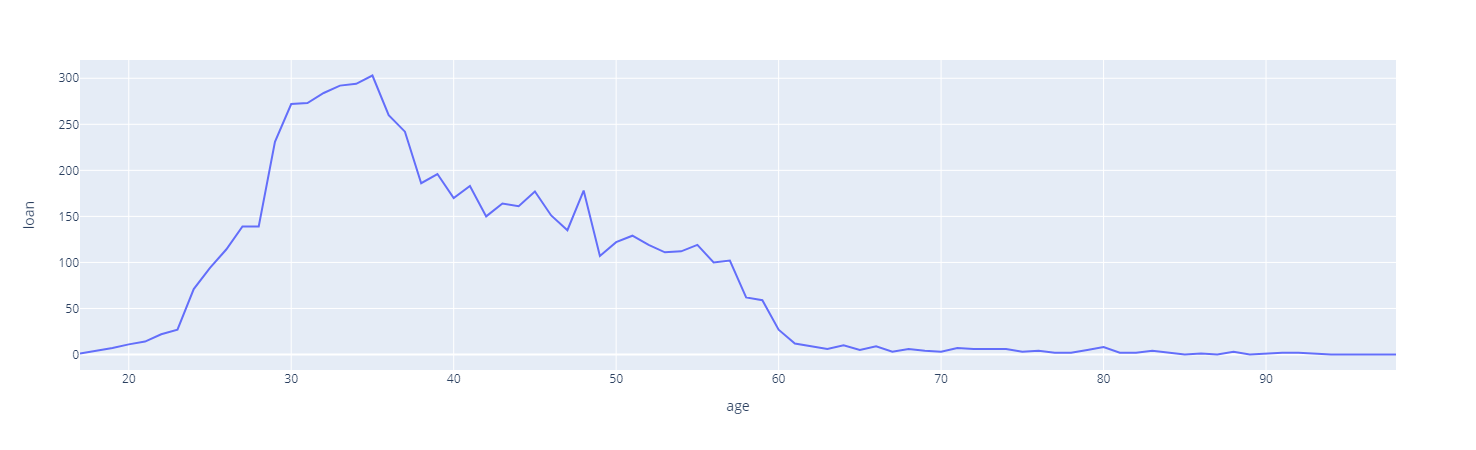

In [234]:
fig = px.line(df_temp, x="age", y="loan")
fig.show()

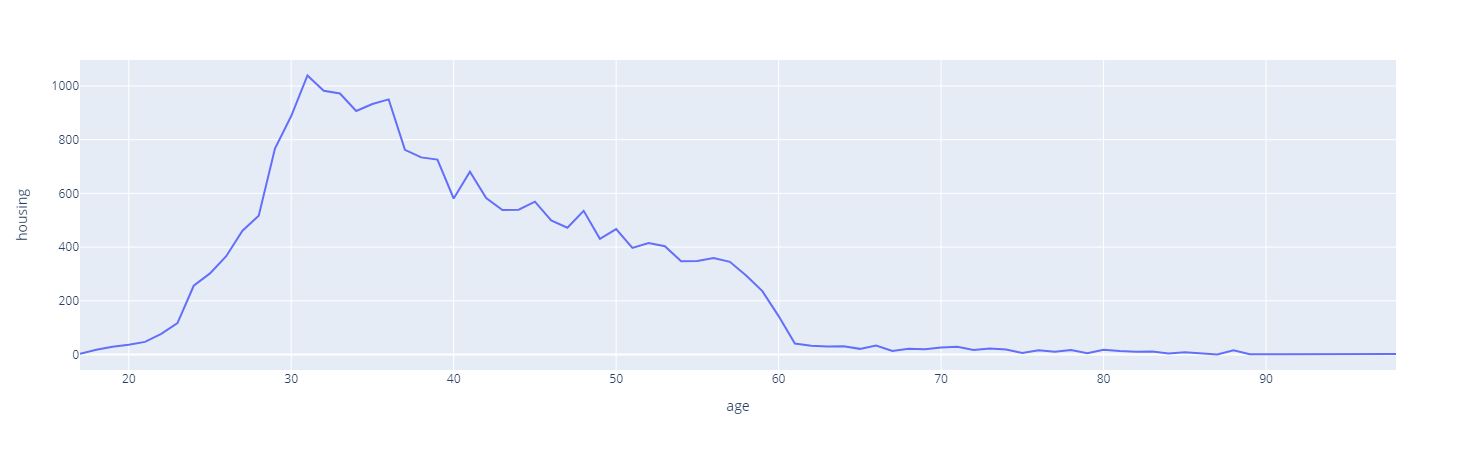

In [235]:
fig = px.line(df_temp, x="age", y="housing")
fig.show()

In [241]:
print('''The age of the customers who have most often a personal or housing loan is between 30 and 40. 
The highest amount of personal loans is at the age of 35.
The highest amount of housing loans is at the age of 31
The number of housing loans ({}) is significantly higher then the number of personal loans ({}).
'''.format(int(df_temp.housing.sum()), int(df_temp.loan.sum())))

The age of the customers who have most often a personal or housing loan is between 30 and 40. 
The highest amount of personal loans is at the age of 35.
The highest amount of housing loans is at the age of 31
The number of housing loans (21571) is significantly higher then the number of personal loans (6248)




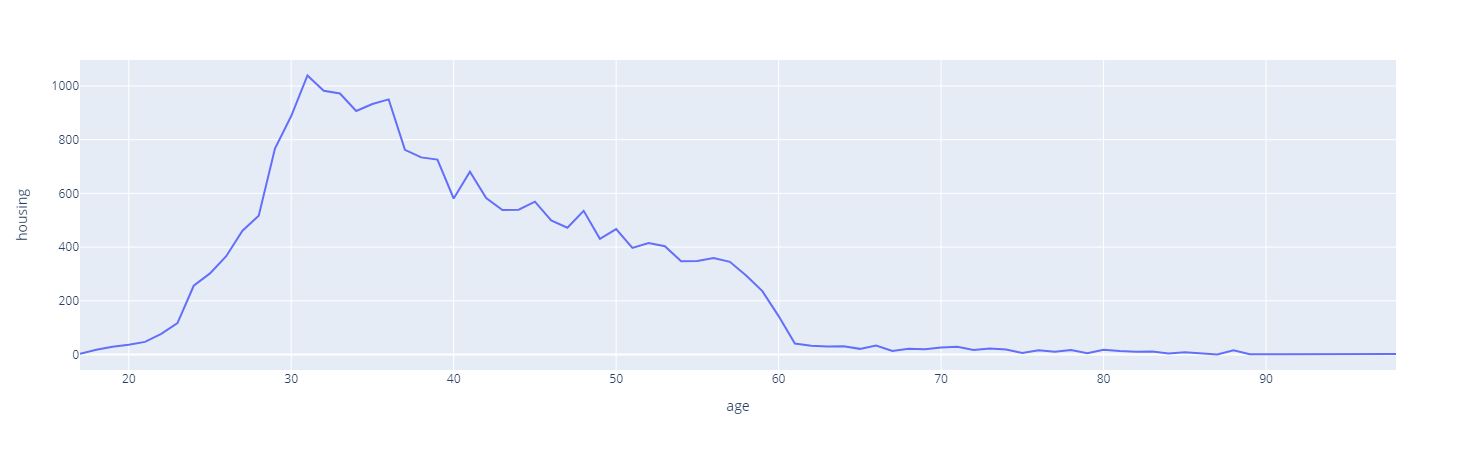

### 4. Does *number of days that passed by after the client was last contacted from a previous campaign* has an impact if there were need for more contacts this campaign.

In [184]:
prev_yes.campaign.value_counts()

1    724
2    400
3    144
4     48
5     26
6     17
7      9
8      5
Name: campaign, dtype: int64

In [185]:
prev_yes.pdays.value_counts()

3     435
6     387
4     116
2      61
10     45
7      45
12     45
5      42
9      40
13     28
1      26
11     25
0      15
14     15
15     15
8      12
16      9
17      3
22      3
18      2
19      2
26      1
27      1
Name: pdays, dtype: int64

In [186]:
prev_yes.previous.value_counts()

1    865
2    320
3    128
4     40
5     15
6      4
7      1
Name: previous, dtype: int64

In [187]:
test = df.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration',  'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [190]:
print('''Median of the number of the contacts for previously contacted customers with success
 - previous campaign: {}
 - current campaign: {}'''.format(prev_yes.pdays.median(), prev_yes.pdays.median()))

Median of the number of the contacts for previously contacted customers with success
 - previous campaign: 5.0
 - current campaign: 5.0


In [174]:
print('''Median of the number of the contacts for previously contacted customers with success
 - previous campaign: {}
 - current campaign: {}'''.format(df_yes_prev.previous.median(), df_yes_prev.campaign.median()))

Median of the number of the contacts for previously contacted customers with success
 - previous campaign: 1.0
 - current campaign: 1.0


In [175]:
print('''Median of the number of the contacts for previously contacted customers with no success
 - previous campaign: {}
 - current campaign: {}'''.format(df_no_prev.previous.median(), df_no_prev.campaign.median()))

Median of the number of the contacts for previously contacted customers with no success
 - previous campaign: 1.0
 - current campaign: 2.0


In [176]:
print('''Median of the number of the contacts for previously contacted customers with no success
 - previous campaign: {}
 - current campaign: {}'''.format(df_no_prev.previous.median(), df_no_prev.campaign.median()))


Median of the number of the contacts for previously contacted customers with no success
 - previous campaign: 1.0
 - current campaign: 2.0


In [177]:
#fig = px.bar(data_frame=temp)
#fig.show()

In [178]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

First, we should split *previous contacts* into two groups: 
 - previous campaign
 - all previous contacts (obviously including the previous campaign
 

In [179]:
df.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [180]:
# Convert target variable into numeric (code used from the VolodymyrGavrysh accomplished Task)
#df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
#df.corr()